# bkds case study - prediction

In [8]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# load ny dataset
def load_df(df_file):
    basepath = 'data/'
    filepath = basepath + df_file
    load_df = pd.DataFrame.from_csv(filepath)
    return load_df

In [5]:
ny_df = load_df('processed_ny_df.csv')

In [6]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating
0,1,2,6882689,198,Apartment,17,2,5
1,2,7,12022627,2200,Apartment,0,2,0
2,1,2,8940740,149,Apartment,6,2,5
3,1,4,12035970,55,Apartment,0,2,0
4,1,2,11642165,65,Apartment,3,1,5


### Linear Regression

Earlier we saw that Capacity and Room Type were particularly correlated to Price, so let's fit a simple linear regression model on them. Price and capacity are both skewed, so we'll log transform these variables

In [9]:
ny_df['log_Price'] = np.log(ny_df.Price)
ny_df['log_Capacity'] = np.log(ny_df.Capacity)

In [10]:
ny_df.head()

,Bedrooms,Capacity,Id,Price,Property_Type,Review_Count,Room_Type,Star_Rating,log_Price,log_Capacity
0,1,2,6882689,198,Apartment,17,2,5,5.288267,0.693147
1,2,7,12022627,2200,Apartment,0,2,0,7.696213,1.945910
2,1,2,8940740,149,Apartment,6,2,5,5.003946,0.693147
3,1,4,12035970,55,Apartment,0,2,0,4.007333,1.386294
4,1,2,11642165,65,Apartment,3,1,5,4.174387,0.693147


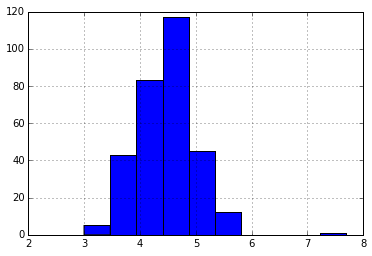

In [11]:
ny_df.log_Price.hist()

In [12]:
# That one point is still an outlier, I'm going to remove it

In [13]:
ny_df = ny_df[ny_df.log_Price<7]

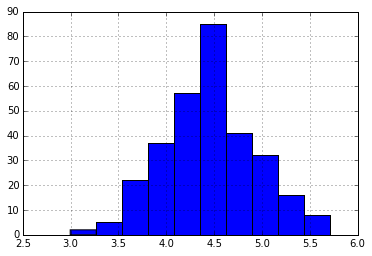

In [14]:
ny_df.log_Price.hist()

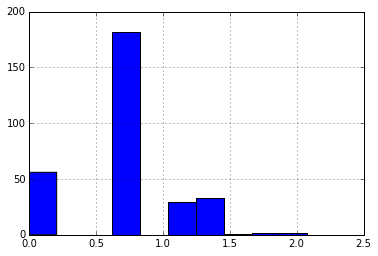

In [15]:
ny_df.log_Capacity.hist()

In [16]:
# create X and y
feature_cols = ['log_Capacity', 'Room_Type']
X = ny_df[feature_cols]
y = ny_df.log_Price

# follow the usual sklearn pattern: import, instantiate, fit
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X, y)

# print intercept and coefficients
print lm.intercept_
print lm.coef_

3.61969751314
[ 0.29991751  0.43839787]


In [17]:
# calculate the R-squared
lm.score(X, y)

0.45249913543221365